# Understanding Lego sets popularity
![image-4](image-4.png)

Most of us have heard or played with Legos at least once. Have you ever wondered why this toy has become so popular? </br>
Using analysis in PostgreSQL and visualization in R, I want to answer these questions:
1) What is the average number of Lego sets released per year?
2) What is the average number of Lego parts per year?
3) What are the 5 most popular colors used in Lego parts?
4) What proportion of Lego parts are transparent?
5) What are the 5 rarest categories of lego bricks?
6) Summarize my findings 



## 📖 Background
### Relationships between the tables

![erd](data/lego_erd.png)

## 💾 The data


#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


## 1) What is the average number of Lego sets released per year?

In [25]:
WITH temp AS (
SELECT year, COUNT( set_num ) AS count_year
FROM sets
GROUP BY year)

SELECT year,AVG( count_year ) AS avg_numbers_of_released_sets
FROM temp
GROUP BY year
ORDER BY AVG_NUMBERS_OF_RELEASED_SETS DESC;

year,avg_numbers_of_released_sets
<int>,<int>
2014,713
2015,665
2012,615
2016,596
2013,593
2011,503
2002,447
2010,444
2003,415


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


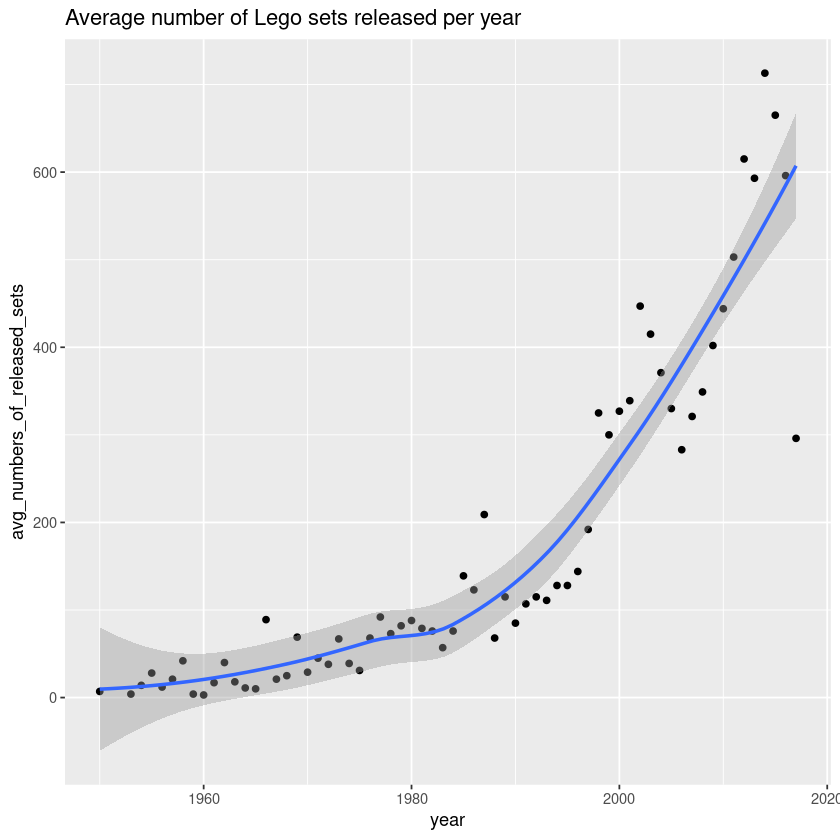

In [26]:
library(ggplot2)
ggplot(sets,aes(x=year,y=avg_numbers_of_released_sets))+geom_point()+geom_smooth()+ggtitle("Average number of Lego sets released per year")

## 2) What is the average number of Lego parts per year?

In [27]:
SELECT year, 
       ROUND( AVG( num_parts ),2 ) AS avg_numbers_of_parts
  FROM sets
 GROUP BY year
 ORDER BY avg_numbers_of_parts DESC;

year,avg_numbers_of_parts
<int>,<dbl>
2017,260.82
2016,253.08
2006,246.83
2008,231.60
2007,227.60
2010,210.43
1990,201.75
2015,201.67
1996,201.59


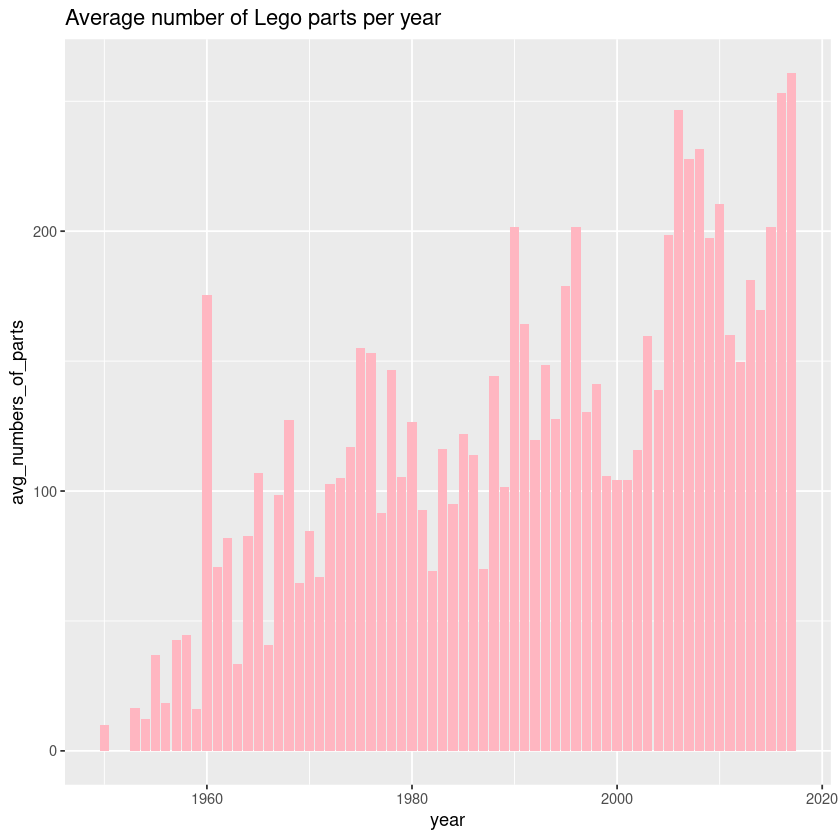

In [28]:
ggplot(sets2,aes(x=year,y=avg_numbers_of_parts))+geom_col(fill="lightpink")+ggtitle("Average number of Lego parts per year")

## 3) What are the 5 most popular colors used in Lego parts?

In [29]:
SELECT c.name AS color_name,COUNT( i.inventory_id ) AS count
FROM Inventory_Parts as i 
INNER JOIN colors as c 
ON i.color_id=c.id
GROUP BY c.name
ORDER BY count DESC
LIMIT 5;

color_name,count
<chr>,<int>
Black,115085
White,66536
Light Bluish Gray,55302
Red,50213
Dark Bluish Gray,43907


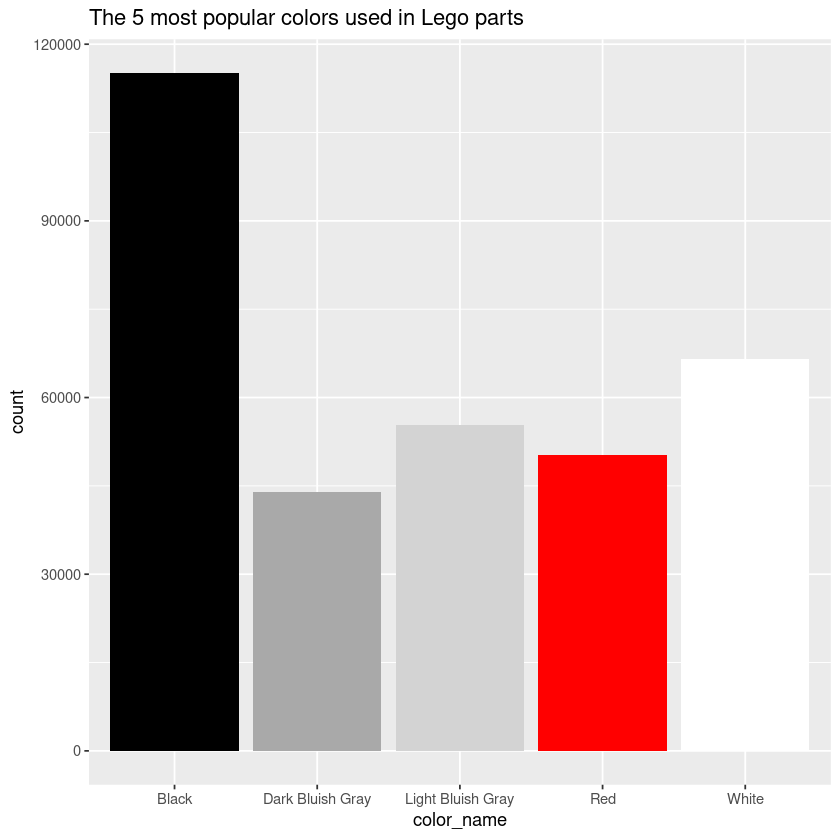

In [30]:
colors <- c('black', 'white', 'lightgrey', 'red', 'darkgray')
ggplot( sets3, aes( x=color_name, y=count ) ) + geom_col( fill=colors )+ggtitle( "The 5 most popular colors used in Lego parts" )

## 4) What proportion of Lego parts are transparent?

In [31]:
WITH all_colors AS(
SELECT COUNT(inventory_id) AS sum
FROM inventory_parts),

transp AS(
SELECT COUNT(i.inventory_id) AS transparent
FROM Inventory_parts as i 
INNER JOIN colors as c 
ON i.color_id=c.id
WHERE c.is_trans is True )


SELECT transparent, all_colors, CONCAT( ROUND( ( transparent::NUMERIC/ sum ) * 100, 2 ),' %' ) AS proportion
FROM  all_colors,transp;

transparent,all_colors,proportion
<int>,<chr>,<chr>
36318,(580069),6.26 %


## 5) What are the 5 rarest categories of lego bricks?

In [32]:
SELECT pc.name AS name_of_category, SUM( i.quantity ) AS number_of_sets
FROM part_categories AS pc
JOIN parts AS p
ON pc.id = p.part_cat_id
JOIN inventory_parts AS i
ON p.part_num = i.part_num
WHERE pc.name LIKE '%Brick%'
GROUP BY pc.name
ORDER BY number_of_sets ASC
LIMIT 5;

name_of_category,number_of_sets
<chr>,<int>
Bricks Printed,4580
Bricks Wedged,9209
Technic Bricks,36173
Bricks Curved,38560
Bricks Round and Cones,48525


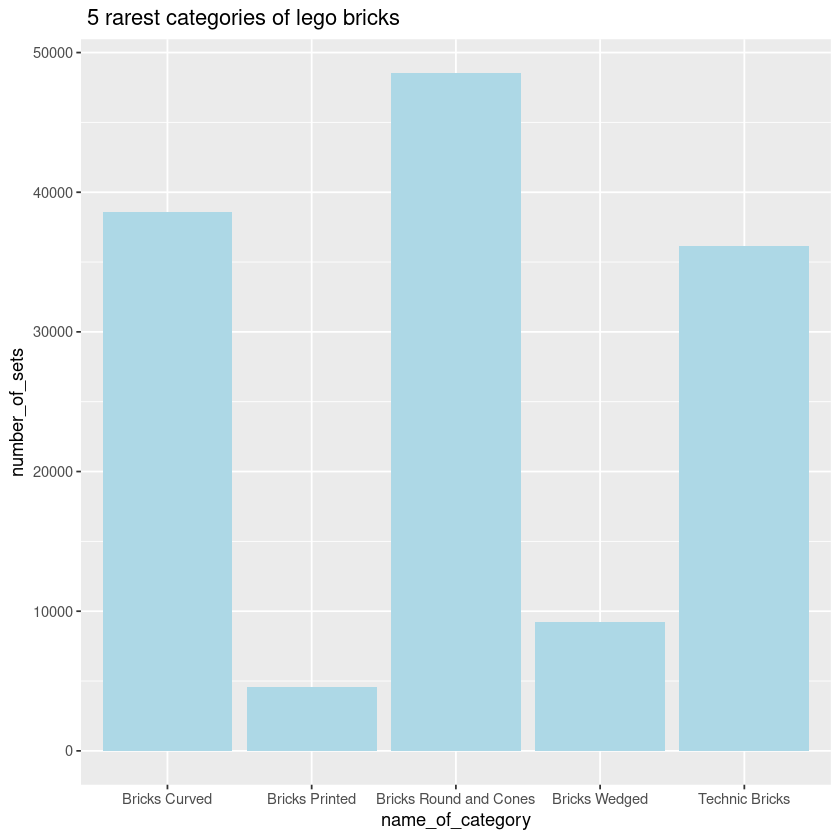

In [33]:
ggplot( sets5, aes( x = name_of_category, y = number_of_sets ) ) + geom_col( fill="lightblue" )+ggtitle( " 5 rarest categories of lego bricks" )

## 6) Summarize my findings

In summary, 
The average annual number of sets has been increasing over time. The three largest averages were in:
- 2014 - 713
- 2015 - 665
- 2012 - 615

Secondly, the three largest avereges number of Lego parts were in:
- 2017 : 260.82
- 2016 : 253.08
- 2006 : 246.83

Moreover, we found out the 5 most popular colors used in Lego parts: Black, White, Light Bluish Gray, Red and Dark Bluish Gray. </br>
What's more, we discovered that 6.26% of the bricks are transparent. </br>

Last but not least, we have known the most rarest categories of Lego bricks:
- Bricks Printed
- Bricks Wedged
- Technic Bricks
- Bricks Curved
- Bricks Round and Cones